Data preprocessing steps that i have used
Data augmention:
1.  rotation_range=15,  
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip
2.resize:
i have resized from 32*32 to 64*64 to 128*128.i choose 32*32 beacuse it givng better accuracy if we take 128*128 model is not able learn too mcuh we can see that from accuracy and more comptuational power.
3.padding:
i applied the padding just to save the edges of image.and not to save any data about the image which is in the corner particular.
4.checked for courrpted images.
if there is any images corrupted imagesm


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Access the training images which is a NumPy array and can be reshaped
df = pd.DataFrame(train_images.reshape(train_images.shape[0], -1)) # Reshape to 2D for DataFrame

#print(df.describe()) # Call describe() on the DataFrame

print(train_images.shape)

(50000, 32, 32, 3)


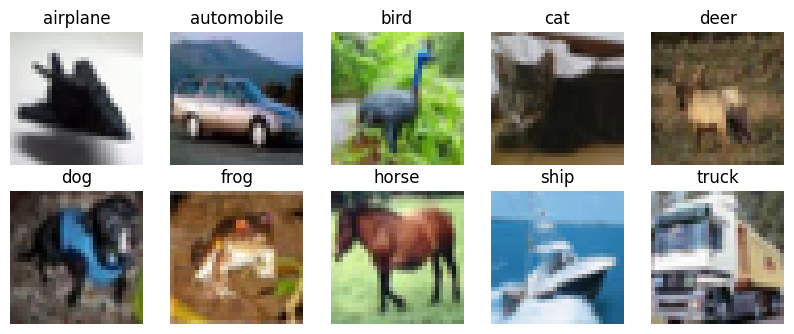

In [7]:

# Class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image from each class
plt.figure(figsize=(10, 10))
for i in range(10):
    # Find the first occurrence of each class in the training set
    idx = (train_labels == i).nonzero()[0][0]
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(classes[i])
    plt.axis('off')
plt.show()


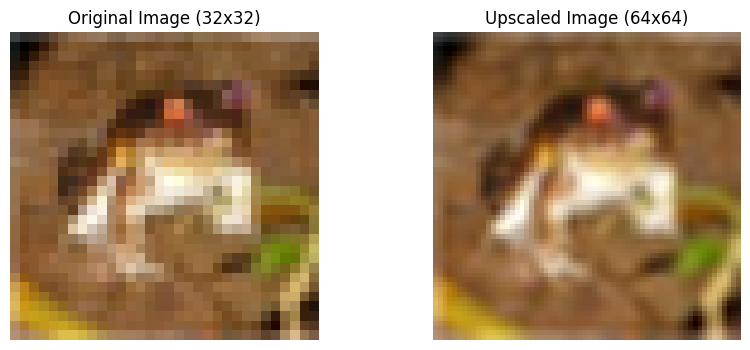

In [8]:
import matplotlib.pyplot as plt
import cv2
# Original image
original_image = train_images[0]

# Upscaled image using the previously defined function
upscaled_image = cv2.resize(original_image, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Plot both images
plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image (32x32)")
plt.imshow(original_image.astype('uint8'))
plt.axis('off')

# Upscaled Image
plt.subplot(1, 2, 2)
plt.title("Upscaled Image (64x64)")
plt.imshow(upscaled_image.astype('uint8'))
plt.axis('off')

plt.show()


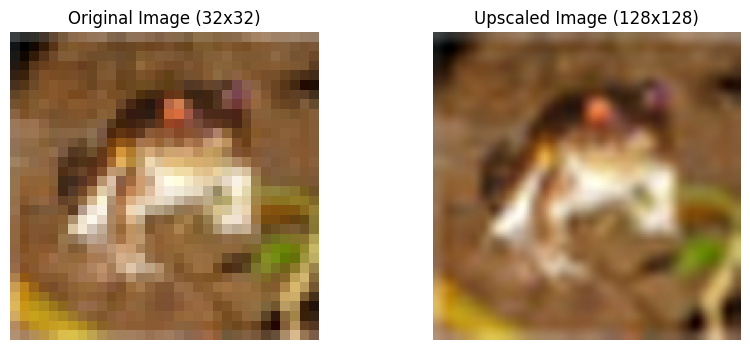

In [9]:
import cv2
import matplotlib.pyplot as plt

# Function to upscale images to a higher resolution
def upscale_image(image, scale_factor):
    upscaled_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    return upscaled_image

# Original image
original_image = train_images[0]

# Upscale to 128x128 (4 times the original size)
upscaled_image = upscale_image(original_image, scale_factor=4)

# Plot both images
plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image (32x32)")
plt.imshow(original_image.astype('uint8'))
plt.axis('off')

# Upscaled Image
plt.subplot(1, 2, 2)
plt.title("Upscaled Image (128x128)")
plt.imshow(upscaled_image.astype('uint8'))
plt.axis('off')

plt.show()


In [10]:
print(df.describe())

               0            1             2            3             4     \
count  50000.000000  50000.00000  50000.000000  50000.00000  50000.000000   
mean     130.710740    136.05614    132.553800    130.14036    135.442380   
std       73.412873     72.90798     80.449751     72.44259     71.901316   
min        0.000000      0.00000      0.000000      0.00000      0.000000   
25%       71.000000     77.00000     61.000000     71.00000     78.000000   
50%      128.000000    135.00000    127.000000    127.00000    135.000000   
75%      189.000000    195.00000    207.000000    188.00000    193.000000   
max      255.000000    255.00000    255.000000    255.00000    255.000000   

               5             6            7             8             9     \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean     131.853580    131.050440    136.24616    132.581440    131.568860   
std       79.598048     72.240546     71.67471     79.434675     72.0165

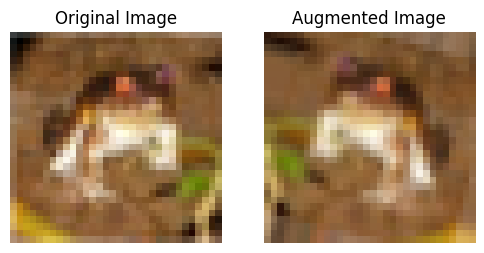

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images
train_images_processed = train_images.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Take one example
example_image = train_images_processed[0]

# Plot original image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(example_image)
plt.title("Original Image")
plt.axis('off')

# Plot augmented image
augmented_image = datagen.random_transform(example_image)

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis('off')

plt.show()


In [7]:
from PIL import Image

def is_corrupted(image_array):
    try:
        image = Image.fromarray(image_array)
        image.verify()  # Verify that it is, in fact, an image
        return False
    except (IOError, SyntaxError) as e:
        return True
train_corrupted = [i for i, img in enumerate(train_images) if is_corrupted(img)]
test_corrupted = [i for i, img in enumerate(test_images) if is_corrupted(img)]

print(f"Corrupted images in training set: {len(train_corrupted)}")
print(f"Corrupted images in test set: {len(test_corrupted)}")



Corrupted images in training set: 0
Corrupted images in test set: 0


In [8]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
print(train_images[0])


[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


Brightness and Contrast: The standard deviation and range suggest that the images have good contrast, with a broad range of light and dark regions.

Consistency: The mean and median are quite close across different channels, indicating consistency in image quality.

Outliers: Ensure no values fall outside the 0-255 range, confirming no anomalies in pixel values.

In [4]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images
train_images_processed = train_images.astype('float32') / 255.0
test_images_processed = test_images.astype('float32') / 255.0

# Split the test set into validation and test sets
test_images_split, val_images, test_labels_split, val_labels = train_test_split(
    test_images_processed, test_labels, test_size=0.5, random_state=42)

# Output the sizes of each set
print(f"Training set size: {train_images_processed.shape[0]}")
print(f"Validation set size: {val_images.shape[0]}")
print(f"Test set size: {test_images_split.shape[0]}")

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the validation set
history = model.fit(train_images_processed, train_labels, epochs=10, batch_size=32,
                    validation_data=(val_images, val_labels))

# Evaluate the model with the validation set
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print(f'Validation accuracy: {val_acc}')

# Evaluate the model with the test set
test_loss, test_acc = model.evaluate(test_images_split, test_labels_split, verbose=2)
print(f'Test accuracy: {test_acc}')


Training set size: 50000
Validation set size: 5000
Test set size: 5000
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 84ms/step - accuracy: 0.3703 - loss: 1.8264 - val_accuracy: 0.5010 - val_loss: 1.4926
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5566 - loss: 1.2552 - val_accuracy: 0.6300 - val_loss: 1.0538
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6288 - loss: 1.0564 - val_accuracy: 0.6314 - val_loss: 1.0600
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.6741 - loss: 0.9356 - val_accuracy: 0.5898 - val_loss: 1.1820
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.7056 - loss: 0.8474 - val_accuracy: 0.6836 - val_loss: 0.9317
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 79ms/step - accuracy: 0.7307 - loss: 0.7828 - val_accuracy: 0.6408 - val_loss: 1.0740
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.7551 - loss: 0.7207 - val_accuracy: 0.7202 - val_loss: 0.858

here my validation and test data are same.just in name wrong error.

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images
train_images_processed = train_images.astype('float32') / 255.0
test_images_processed = test_images.astype('float32') / 255.0

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model without data augmentation
history = model.fit(train_images_processed, train_labels, epochs=10, batch_size=32,
                    validation_data=(test_images_processed, test_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(test_images_processed, test_labels, verbose=2)
print(f'Validation accuracy: {val_acc}')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 82ms/step - accuracy: 0.3669 - loss: 1.8434 - val_accuracy: 0.5287 - val_loss: 1.3170
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.5568 - loss: 1.2422 - val_accuracy: 0.5963 - val_loss: 1.1360
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 85ms/step - accuracy: 0.6280 - loss: 1.0567 - val_accuracy: 0.5998 - val_loss: 1.1715
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 80ms/step - accuracy: 0.6701 - loss: 0.9374 - val_accuracy: 0.6863 - val_loss: 0.9032
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.7050 - loss: 0.8494 - val_accuracy: 0.6405 - val_loss: 1.0773
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.7288 - loss: 0.7820 - val_accuracy: 0.6939 - val_loss: 0.9031
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.7510 - loss: 0.7205 - val_accuracy: 0.6593 - val_loss: 1.0532
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images
train_images_processed = train_images.astype('float32') / 255.0
test_images_processed = test_images.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate the image by up to 15 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of the height
    horizontal_flip=True  # Randomly flip the image horizontally
)
datagen.fit(train_images_processed)

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images_processed, train_labels, batch_size=32),
                    epochs=10,
                    validation_data=(test_images_processed, test_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(test_images_processed, test_labels, verbose=2)
print(f'Validation accuracy: {val_acc}')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 106ms/step - accuracy: 0.3252 - loss: 1.9492 - val_accuracy: 0.5277 - val_loss: 1.3060
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4851 - loss: 1.4367 - val_accuracy: 0.3938 - val_loss: 2.0739
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 99ms/step - accuracy: 0.5482 - loss: 1.2844 - val_accuracy: 0.5979 - val_loss: 1.1234
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 99ms/step - accuracy: 0.5889 - loss: 1.1738 - val_accuracy: 0.6274 - val_loss: 1.0539
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 103ms/step - accuracy: 0.6101 - loss: 1.1111 - val_accuracy: 0.6025 - val_loss: 1.1383
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 98ms/step - accuracy: 0.6326 - loss: 1.0677 - val_accuracy: 0.6084 - val_loss: 1.1622
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 103ms/step - accuracy: 0.6486 - loss: 1.0231 - val_accuracy: 0.6699 - val_loss: 0.9449
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accur